# Homework 08: Spectral Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spa

## Importing Data Set

In [2]:
X = np.genfromtxt("hw08_data_set.csv", delimiter=',')

N = X.shape[0]

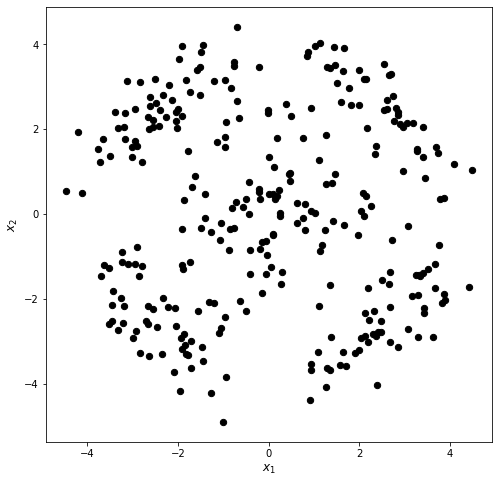

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=40, color="k")

plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)

plt.show()

## Euclidean Distance & Connectivity Matrix

In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt((x2[0] - x1[0])**2 + (x2[1] - x1[1])**2)

In [5]:
euc = np.array([[euclidean_distance(X[i], X[k]) for k in range(N)] for i in range(N)])

threshold = 1.25
B = np.array([[1 if euc[i, k] < threshold and i != k else 0 for k in range(N)] for i in range(N)])

In [6]:
print(f"Euclidean Distances:\n{euc}")

Euclidean Distances:
[[0.         3.43155242 1.47659004 ... 2.80701692 4.05049067 2.78939966]
 [3.43155242 0.         1.95733324 ... 2.47305187 4.09447639 4.39463093]
 [1.47659004 1.95733324 0.         ... 1.99673959 3.63482165 3.08286235]
 ...
 [2.80701692 2.47305187 1.99673959 ... 0.         1.72410302 2.09296065]
 [4.05049067 4.09447639 3.63482165 ... 1.72410302 0.         1.86219445]
 [2.78939966 4.39463093 3.08286235 ... 2.09296065 1.86219445 0.        ]]


In [7]:
print(f"B matrix:\n{B}")

B matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Visualization of Connectivity Matrix

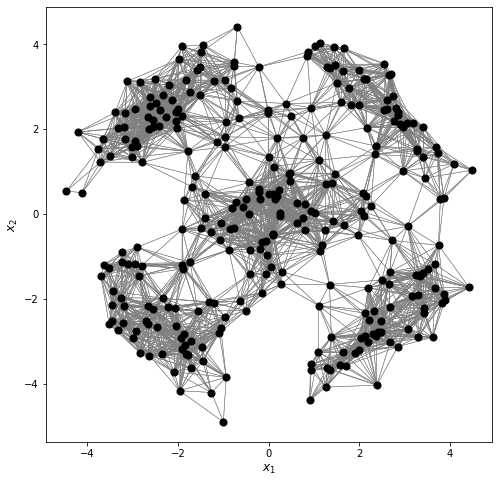

In [8]:
plt.figure(figsize=(8, 8))

for i in range(N):
    for k in range(N):
        if B[i, k] == 1 and i != k:
            plt.plot(np.array([X[i, 0], X[k, 0]]), np.array([X[i, 1], X[k, 1]]), linewidth=0.5, c="grey")

plt.scatter(X[:, 0], X[:, 1], s=50, color="k", zorder=3)

plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)

plt.show()

## Degree, Laplacian & Normalized Laplacian Matrices

$d_{ii} = \sum_{j \neq i} b_{ij} \forall i$

$\text{L} = \text{D} - \text{B}$

$\text{L}_\text{SYMMETRIC} = \text{I} - \text{D}^{-\frac{1}{2}}*\text{B}*\text{D}^{-\frac{1}{2}}$

In [9]:
D = np.zeros((300, 300), dtype=int)

for i in range(300):
    D[i, i] = B[i].sum()
    
print(f"Degree Matrix:\n{D}")

Degree Matrix:
[[20  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 14]]


In [10]:
L = D - B
print(f"Laplacian Matrix:\n{L}")

Laplacian Matrix:
[[20  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 14]]


In [11]:
D_new = np.zeros((300, 300))

for i in range(300):
    D_new[i, i] = D[i, i]**(-1/2)

In [12]:
L_symmetric = np.eye(300) - (D_new @ B @ D_new)
print(f"Normalized Laplacian Matrix:\n{L_symmetric}")

Normalized Laplacian Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## Eigenvectors of Normalized Laplacian Matrix

In [13]:
R = 5
eig_vals, eig_vecs = np.linalg.eig(L_symmetric)
Z = eig_vecs[:,np.argsort(eig_vals)[1:R+1]]
print(f"Z Matrix:\n{Z}")

Z Matrix:
[[-0.00225332 -0.02970626  0.1215077   0.05350856  0.05881185]
 [-0.01934478 -0.01583822  0.0602155   0.02464899 -0.12571926]
 [-0.00694396 -0.02992297  0.12951246  0.05271498 -0.05379749]
 ...
 [-0.00067333 -0.00106953  0.03446799 -0.06659001 -0.03322699]
 [ 0.01344962  0.01237144  0.01390019 -0.11784073  0.01399391]
 [ 0.025202   -0.03167207  0.00258001 -0.00728212  0.03877666]]


In [14]:
centroids = np.vstack([Z[28], Z[142], Z[203], Z[270], Z[276]])
print(f"Initial Centroids:\n{centroids}")

Initial Centroids:
[[-0.00325886 -0.03070096  0.12747516  0.05551091  0.03543487]
 [ 0.0342538   0.11685073 -0.02269928  0.06127445 -0.00404365]
 [ 0.01188869  0.03876559 -0.00024575 -0.04717368  0.01128642]
 [ 0.01512635  0.03295704  0.00463725 -0.08546651  0.01848106]
 [-0.00092625  0.02155608  0.00332934 -0.07374296  0.01282762]]


## K-Means Algorithm

In [15]:
def update_memberships(centroids, X):
    D = spa.distance_matrix(centroids, X)
    memberships = np.argmin(D, axis = 0)
    return(memberships)

def update_centroids(memberships, X):
    centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

In [16]:
memberships = update_memberships(centroids, Z)
iteration = 1
K = 5

while True:
    print(f"Iteration #{iteration}")
    print(f"Centroids:\n{centroids}")
    print(f"Memberships:\n{memberships}\n")
    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break
    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    iteration += 1
    
centroids = update_centroids(memberships, X)

Iteration #1
Centroids:
[[-0.00325886 -0.03070096  0.12747516  0.05551091  0.03543487]
 [ 0.0342538   0.11685073 -0.02269928  0.06127445 -0.00404365]
 [ 0.01188869  0.03876559 -0.00024575 -0.04717368  0.01128642]
 [ 0.01512635  0.03295704  0.00463725 -0.08546651  0.01848106]
 [-0.00092625  0.02155608  0.00332934 -0.07374296  0.01282762]]
Memberships:
[0 2 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 4 4 2 2 2 4 4 2 4 2 4 4 4 4 4 4 4 4 4 2 2 2 4 2 4 4 4 4 4 4 4 2 4 4
 4 4 2 4 2 2 2 4 4 2 2 4 2 2 4 4 4 2 2 3 4 1 3 3 2 2 1 3 2 2 3 3 4 2 3 1 4
 2 4 4 4 2 3 3 1 2 3 3 4 3 2 4 4 3 2 2 4 2 2 3 3 3 3 2 3 3 3 3 4 3 3 4 3 3
 3 2 3 4 2 4 4 3 4 2 4 3 4 2 2 3 4 4 3 0 4 4 3 3 2 3 2 3 4 3 2 2 3 2 3 3 3
 4 4 3 2]

Iteration #2
Centroids:
[[-0.0042450

## Visualization of Clustering Results

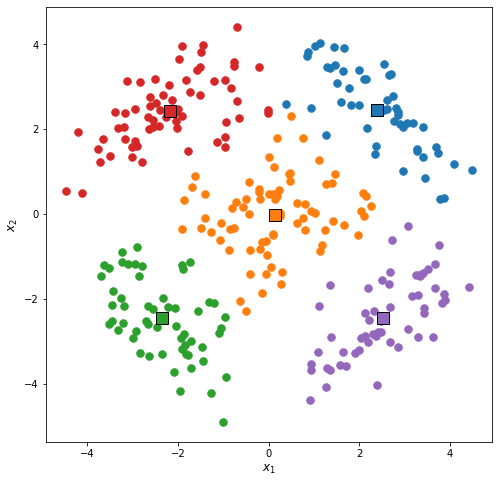

In [17]:
colors = ["C0", "C2", "C3", "C1", "C4"]

plt.figure(figsize=(8, 8))

for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 15, color=colors[c])

for c in range(K):
    plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
             markerfacecolor = colors[c], markeredgecolor = "black")
    
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
    
plt.show()